[13.23945254 13.23945254 12.91748814 11.33068975 12.87359603 12.47234565
 12.47234565 10.59977565 10.59977565  9.95385618  6.80303219  8.33588873
  9.33527048  9.02373827  7.08561298  4.22440411  4.22440411  8.27357102
  9.07989156  7.20168393  7.35778772  1.13371484  1.13371484  5.10682319
  4.20550137  4.20550137  4.2320378   5.17573564  5.21705065  0.51293236
  7.36332092  1.9384104  -1.07232724  3.03508726  3.03508726 13.53482042
 11.70072594 13.62628455 13.62628455 13.27872087 13.27872087 12.76663658
 13.62628455 12.67655464 12.67655464 13.12288891 12.45477346 12.45286105
 13.68116302 12.33947782 13.54212688 13.54212688 13.04163477 13.04163477
 13.20554956 13.42506347 12.56629819 13.38847782 13.38847782 13.20554956
  9.88822749 11.95532849 13.15067109 12.95017064 13.11480607 13.29701369
 13.06723406  8.91868665  9.71541109 11.08269557 11.08269557 10.52532955
 10.30559344 10.30559344 10.67294696 10.58148283  9.13358392 11.11119839
 10.9262747  10.9262747   9.84196386 11.33801876 11

NameError: name 'x' is not defined

[-0.18203127  0.40267172  1.12965933  1.0574474   1.70573055  1.52605512
  1.23691278  1.64682768  0.32784153  0.96191082  0.43969857  1.77964094
  0.82770216  2.13962224  1.33761782  1.3932244   1.34464131  0.84411397
  1.47110151  0.34790611  0.69402851  0.77709367  1.68412136  1.3823463
  1.60279011  1.31385686  0.94486449  1.41694916  1.39935327  1.18781414
  0.90098793  1.34176333  1.41694916  2.1125175   2.11795545  1.69019527
  0.69364769  1.18859931  1.22454295  1.1757374   0.78030053  0.76377513
  1.15876399  2.0889982   1.69090274  0.47583945  0.63978235  0.5869368
  0.64320098  1.66309053  2.14320769  1.18115835  0.78048707  0.186954
  1.22723642  0.94633843  2.10438607  1.22454295  1.26985595  0.20248973
  1.23538485  1.37140824  1.55639049  0.77975221  1.20622259  1.23691278
  2.1233594   1.49352943  1.86162515  1.3010892   0.36254858  1.33414783
  1.63667624  1.41154522  1.66976726  2.17485841  1.70573055  0.0946539
  2.09785674 -0.23893341  2.17485841  1.73627334  1.3635

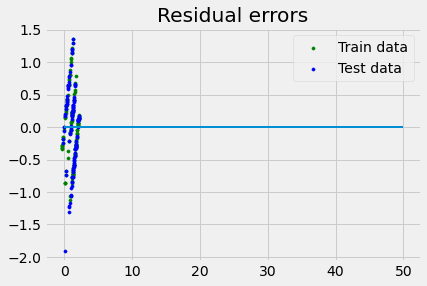

In [1]:
import pandas as pd
import matplotlib.pyplot as mtpplt  
import numpy as nmp  
from sklearn import datasets as DS  
from sklearn import linear_model as LM  
from sklearn import metrics as mts  
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline
from sklearn.linear_model import LinearRegression


def convert(data):
    number = preprocessing.LabelEncoder()
    data['age'] = number.fit_transform(data.age)
    data['gender'] = number.fit_transform(data.gender)
    data['type'] = number.fit_transform(data.type)
    data['gradeVA'] = number.fit_transform(data.gradeVA)
    data['RAPD'] = number.fit_transform(data.RAPD)
    data['zone'] = number.fit_transform(data.zone)
    data['traumaticcataract'] = number.fit_transform(data.traumaticcataract)
    data['TON'] = number.fit_transform(data.TON)
    data['FB'] = number.fit_transform(data.FB)
    data['RD'] = number.fit_transform(data.RD)
    data['Endophthalmitis'] = number.fit_transform(data.Endophthalmitis)
    data['OTStotalscore'] = number.fit_transform(data.OTStotalscore)
    data['lastFUBGrade'] = number.fit_transform(data.lastFUBGrade) 
    data=data.fillna(-999)
    return data

ogidata = pd.read_csv("ogithreeCat.csv")
ogidata = convert(ogidata)

temp = ogidata.drop('lastFUBGrade', axis=1)
y = ogidata['lastFUBGrade']
X  = (temp-np.min(temp))/(np.max(temp)-np.min(temp))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state = 1)

reg1 = LinearRegression()
reg1.fit(X_train, y_train)

y_pred = reg1.predict(X_test)
print (y_pred)
  
print('Regression Coefficients are: ', reg1.coef_)           
print('Variance score is: {}'.format(reg1.score(X_test, y_test)))  
mtpplt.style.use('fivethirtyeight')  
      
    # here we will plot the residual errors in training data  
mtpplt.scatter(reg1.predict(X_train), reg1.predict(X_train) - y_train,color = "green", s = 10, label = 'Train data')  
      
    # Here, we will plot the residual errors in test data  
mtpplt.scatter(reg1.predict(X_test), reg1.predict(X_test) - y_test,color = "blue", s = 10, label = 'Test data')  
      
    # Here, we will plot the line for zero residual error  
mtpplt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)  
      
    # here, we will plot the legend  
mtpplt.legend(loc = 'upper right')  
      
    # now, we will plot the title  
mtpplt.title("Residual errors")  
      
    # here, we will define the method call for showing the plot  
mtpplt.show()  


In [9]:
import pandas as pd
import matplotlib.pyplot as mtpplt  
import numpy as np  
from sklearn.model_selection import KFold
from sklearn import datasets as DS  
from sklearn import linear_model as LM  
from sklearn import metrics as mts  
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline
from sklearn.linear_model import LinearRegression


def convert(data):
    number = preprocessing.LabelEncoder()
    data['age'] = number.fit_transform(data.age)
    data['gender'] = number.fit_transform(data.gender)
    data['type'] = number.fit_transform(data.type)
    data['gradeVA'] = number.fit_transform(data.gradeVA)
    data['RAPD'] = number.fit_transform(data.RAPD)
    data['zone'] = number.fit_transform(data.zone)
    data['traumaticcataract'] = number.fit_transform(data.traumaticcataract)
    data['TON'] = number.fit_transform(data.TON)
    data['FB'] = number.fit_transform(data.FB)
    data['RD'] = number.fit_transform(data.RD)
    data['Endophthalmitis'] = number.fit_transform(data.Endophthalmitis)
    data['OTStotalscore'] = number.fit_transform(data.OTStotalscore)
    data['lastFUBGrade'] = number.fit_transform(data.lastFUBGrade) 
    data=data.fillna(-999)
    return data

ogidata = pd.read_csv("ogithreeCat.csv")
ogidata = convert(ogidata)

temp = ogidata.drop('lastFUBGrade', axis=1)
X = ogidata.iloc[:, :-1]
y = ogidata.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)

kf = KFold(n_splits=10)



regressor = LinearRegression()
for train_index, test_index in kf.split(X_train):
   X_train_kf, X_test_kf = X_train[train_index], X_train[test_index]
   y_train_kf, y_test_kf = y_train[train_index], y_train[test_index]
   regressor.fit(X_train_kf, y_train_kf)
   y_pred = regressor.predict(X_test_kf)


score = regressor.score(X_test, y_test)
print(score)



KeyError: "None of [Int64Index([ 24,  25,  26,  27,  28,  29,  30,  31,  32,  33,\n            ...\n            230, 231, 232, 233, 234, 235, 236, 237, 238, 239],\n           dtype='int64', length=216)] are in the [columns]"